# Zuntz's files

In [22]:
import numpy as np
from astropy.table import Table
import pickle
import matplotlib.pyplot as plt

In [7]:
with open("files/vae_project_data_v1.pkl", 'rb') as f:
    data = pickle.load(f)

In [14]:
data.keys()

dict_keys(['nz_mean_0', 'nz_cov_0', 'nz_mean_1', 'nz_cov_1', 'nz_mean_2', 'nz_cov_2', 'nz_mean_3', 'nz_cov_3', 'nz_z', 'data_vector', 'data_covariance', 'scale_cut_ell_min', 'scale_cut_ell_max', 'fixed_cosmo_params', 'varied_cosmo_params', 'window_ell', 'window_weight'])

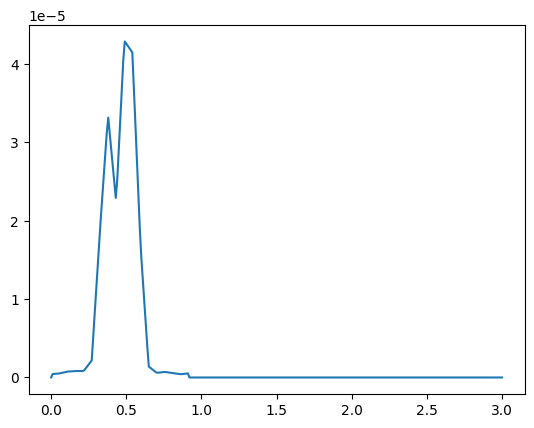

In [24]:
plt.plot(data["nz_z"], data["nz_mean_0"])

In [ ]:
from matplotlib.colors import LogNorm
colorss = ["k", "k", "k", "k"]
figure, axis = plt.subplots(2, 4, figsize=(20,10))
figure.subplots_adjust(wspace=0, hspace=0.01)
for i in range(0, len(nzs_covs.keys())):
    zs, nz = data["nz_z"], data["mz_mean_{}".format(i)]
    cov = data["nz_cov_{}".format(i)]
    axis[0 , i].errorbar(zs, nz, yerr=np.sqrt(np.diag(cov)), fmt='{}o-'.format(colorss[i]), label="$HSC_{}$".format(i))
    axis[0, i].set_ylim(0, 0.2)
    axis[0, i].set_title(r"$p(z)_{}$".format(i), y=0.9)
    axis[0, i].set_xticks([])
    if i > 0:
        axis[0, i].set_yticks([])
for i in range(0, len(nzs_covs.keys())):
    cov = data["nz_cov_{}".format(i)]
    z = data["nz_z"]
    err = np.sqrt(np.diag(cov))
    corr = cov / (np.outer(err, err))
    im = axis[1, i].imshow(abs(corr), cmap='gray_r', norm=LogNorm(vmin=0.001, vmax=1),
                           extent=[min(z), max(z), max(z), min(z)])
    if i > 0:
        axis[1, i].set_yticks([])
    else:
        axis[1, i].set_ylabel(r"$z$")
    axis[1, i].set_xlabel(r"$z$")
cbar_ax = figure.add_axes([0.905, 0.15, 0.005, 0.3])
figure.colorbar(im, cax=cbar_ax)
plt.savefig('/mnt/c/Users/Jaime/Desktop/Nz_paper_plots/original_covs.pdf', bbox_inches='tight',  pad_inches=0)